## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [4]:
df_fifa = df[df['tournament'] == 'FIFA World Cup']

In [5]:
df_fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
39945,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False
39946,2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True
39947,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True


In [6]:
df_group2 = df_fifa.groupby('home_team', as_index=False).sum().sort_values('home_score',ascending=False).head(10)

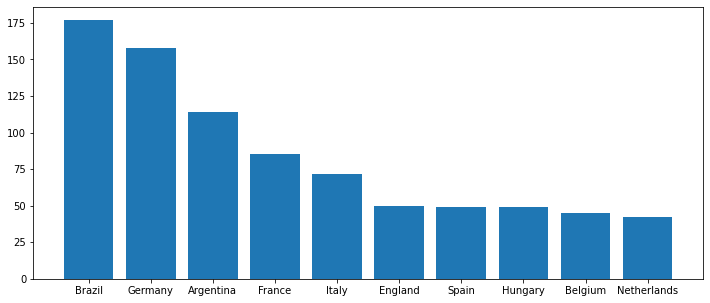

In [7]:
fig = plt.figure(figsize=(12,5))
ax = plt.bar(df_group2['home_team'], df_group2['home_score'])


In [8]:
df_group3 = df_fifa.groupby('home_team', as_index=False).sum().sort_values('home_score',ascending=False)

In [9]:
@interact
def bar_plot(x= 'home_team', 
                 y=list(df_group3.select_dtypes('number').columns)):

    # trace
    trace = [go.Bar(x=df_group3[x], y=df_group3[y])]

    # layout
    layout = go.Layout(
                title = 'Bar graph', # Graph title
                xaxis = dict(title = x.title()), # x-axis label
                yaxis = dict(title = y.title()), # y-axis label
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

interactive(children=(Text(value='home_team', description='x'), Dropdown(description='y', options=('home_score…

## Task
What is the number of matches played in each tournament throughout history?

In [10]:
df_tourn = df['tournament'].value_counts().to_frame('matches').reset_index().head(10)

In [11]:
df_tourn

,index,matches
0,Friendly,17029
1,FIFA World Cup qualification,7236
2,UEFA Euro qualification,2582
3,African Cup of Nations qualification,1672
4,FIFA World Cup,900
5,Copa América,813
6,AFC Asian Cup qualification,724
7,African Cup of Nations,690
8,CECAFA Cup,620
9,CFU Caribbean Cup qualification,606


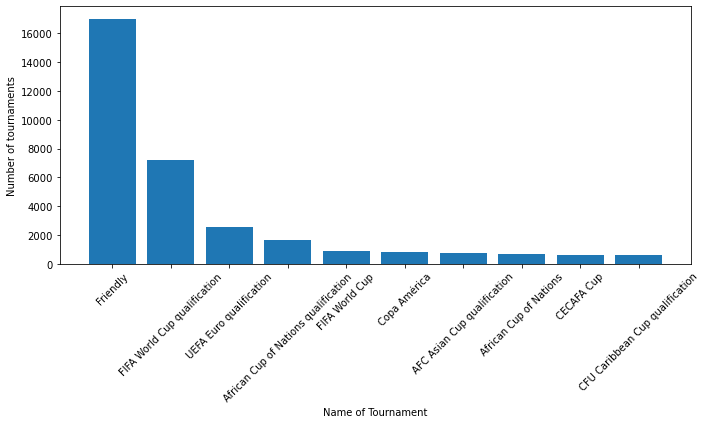

In [12]:
fig, ax = plt.subplots(figsize = (10,6))

# bar graph
ax.bar(df_tourn['index'], df_tourn['matches'])
ax.set_ylabel('Number of tournaments')
ax.set_xlabel('Name of Tournament')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
data = [go.Bar(x=df_tourn['index'], y=df_tourn['matches'])]
layout = go.Layout(title = 'Tournament matches', xaxis = dict(title = 'Tournament'), yaxis = dict(title = 'Matches played'))
fig = go.Figure(data = data, layout = layout)
fig.show()

## Task 
Show the trend in number of matches per year.

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['year'] = df['date'].dt.year

In [16]:
df_tourn2 = df.groupby(['year'], as_index=False).count()

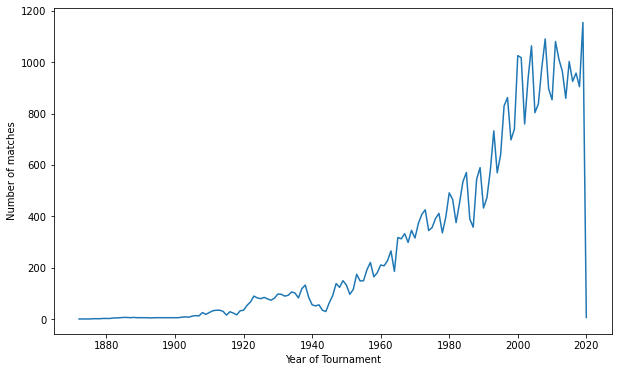

In [17]:
fig, ax = plt.subplots(figsize = (10,6))

# bar graph
ax.plot(df_tourn2['year'], df_tourn2['date'])
ax.set_ylabel('Number of matches')
ax.set_xlabel('Year of Tournament')
plt.show()

## Task
Which teams are the most successful ones? (winning percentage)

In [18]:
def winner(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return 0

df['winner'] = df.apply(winner, axis = 1)

x = df.groupby(['winner']).size()/(df.groupby(['home_team']).size()+df.groupby(['away_team']).size())

In [19]:
x = x.drop(0, axis=0)

In [20]:

x = x.sort_values(ascending=False).head(10)

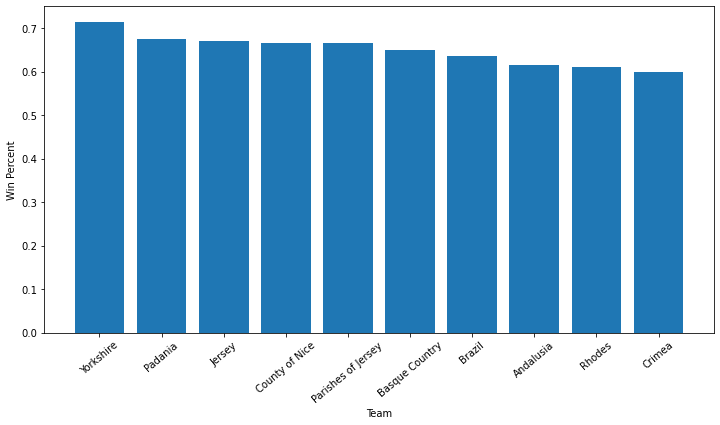

In [21]:
fig, ax = plt.subplots(figsize = (12,6))

# bar graph
ax.bar(x.index, x.tolist())
ax.set_ylabel('Win Percent')
ax.set_xlabel('Team')
plt.xticks(rotation=40)
plt.show()

## Task
Which teams are the least successful ones? (winning percentage)

In [22]:
x = df.groupby(['winner']).size()/(df.groupby(['home_team']).size()+df.groupby(['away_team']).size())
x_sorted = x.sort_values().head(10)

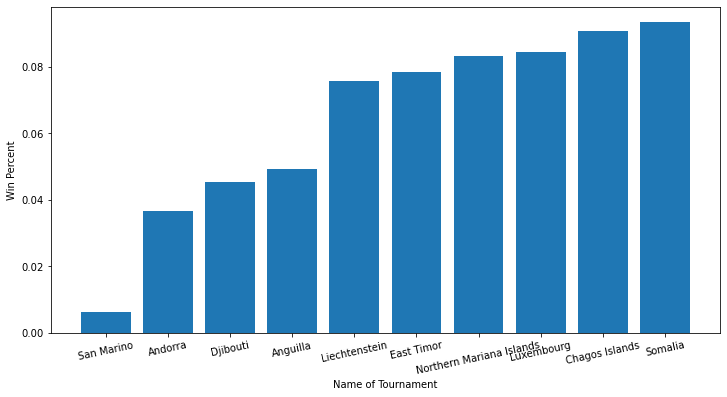

In [23]:
fig, ax = plt.subplots(figsize = (12,6))

# bar graph
ax.bar(x_sorted.index, x_sorted.tolist())
ax.set_ylabel('Win Percent')
ax.set_xlabel('Name of Tournament')
plt.xticks(rotation=12)
plt.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [24]:
df['month'] = df['date'].dt.month

In [25]:
month_nums = df.groupby('month').size()

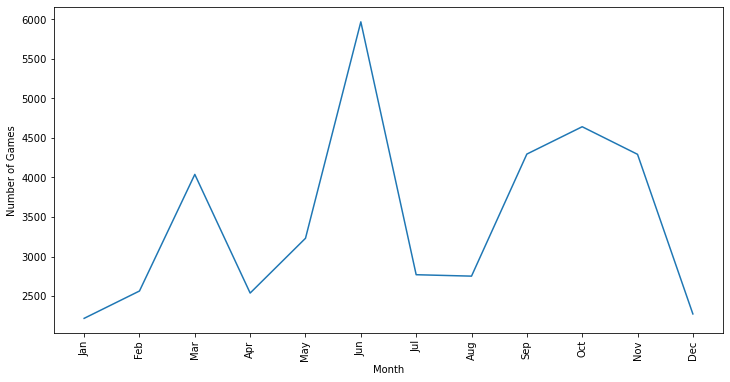

In [26]:
fig, ax = plt.subplots(figsize = (12,6))


ax.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'], month_nums.tolist())
ax.set_ylabel('Number of Games')
ax.set_xlabel('Month')
plt.xticks(rotation=90)
plt.show()

## Task
Which teams played against each other the most?

In [27]:
def pairs(row):
    pairs = sorted([row['home_team'], row['away_team']])
    return str(pairs)

In [28]:
df['pairs'] = df.apply(pairs, axis=1)

In [29]:
pairs_df = df.groupby('pairs').size()

In [30]:
pairs_df = pairs_df.sort_values(ascending=False).head(10)

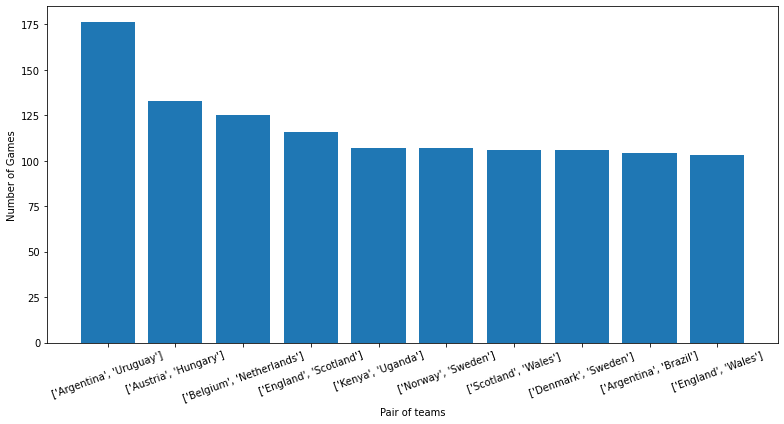

In [31]:
fig, ax = plt.subplots(figsize = (11,6))

# bar graph
ax.bar(pairs_df.index, pairs_df.tolist())
ax.set_ylabel('Number of Games')
ax.set_xlabel('Pair of teams')

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.